# TUGAS 1 
## Brilyan Satria Wahyuda
### TI-3H 05 2241720019

### Import Library

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Persiapan data

In [4]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Cek isi kolom null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Encoding data ke numerik

In [6]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop(columns=['class'])
y = df['class']  

print(f"Shape of X: {X.shape}\n")
print(f"Encoded labels: {y}")

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(y)

Shape of X: (8124, 22)

Encoded labels: 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32
(8124, 22)
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


Split data test dan train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training decision tree dengan hyperparameters

In [8]:

dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

### Menggambar decision tree

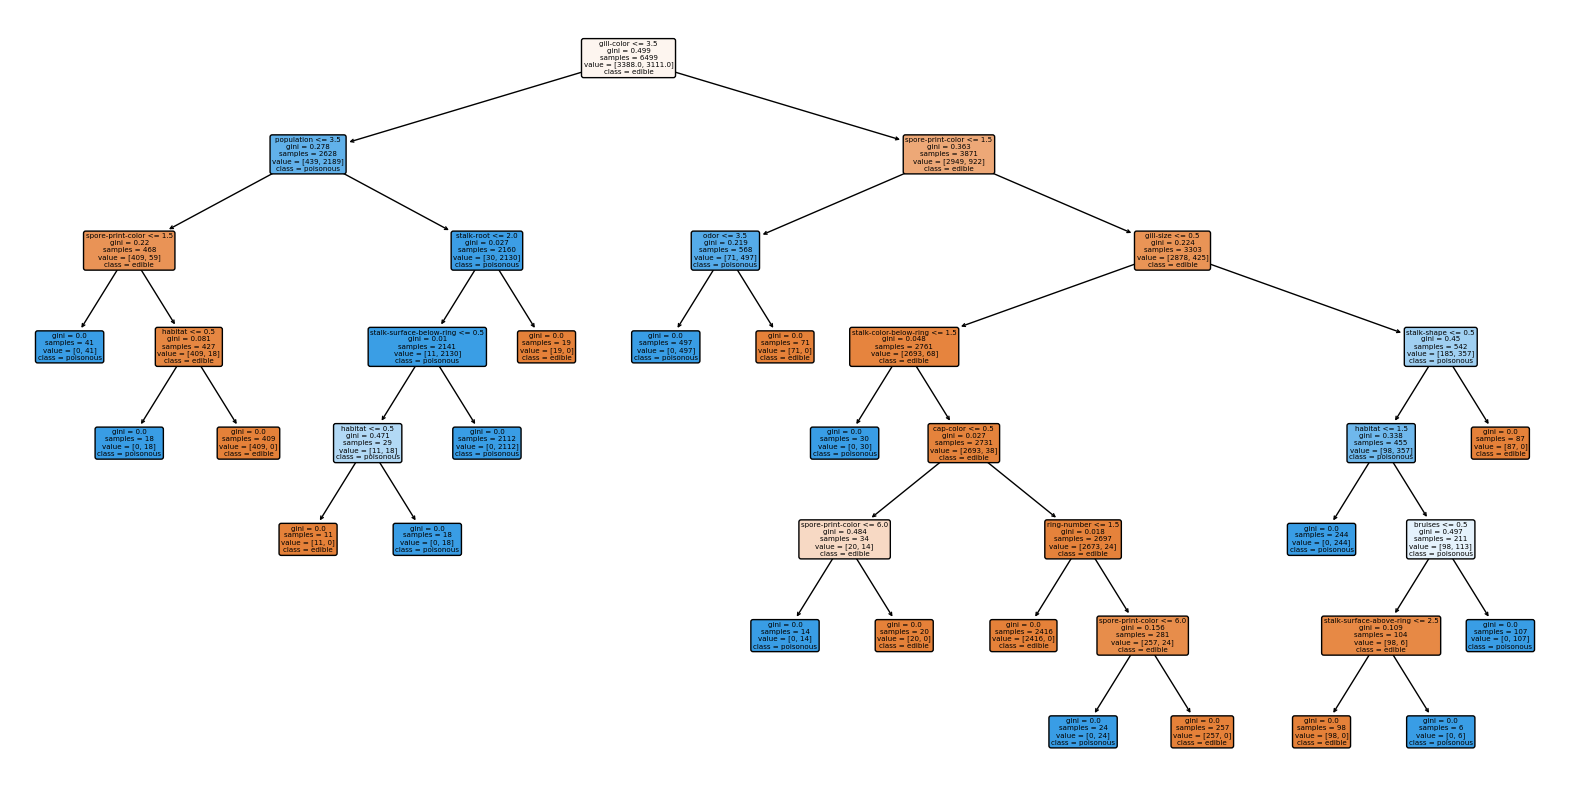

In [9]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Mengambil model Decision Tree terbaik dari GridSearchCV
best_dt = dt_grid.best_estimator_

# Menggambar Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X_train.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

### Training RandomForest dengan hyperparameters

In [10]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

### Evaluasi

In [11]:
# Membandingkan parameter 
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Random Forest parameters:", rf_grid.best_params_)

# Mengambil model terbaik dari GridSearchCV
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)

# Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100 :.2f} %")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100 :.2f} %")

# Classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Random Forest parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Decision Tree Accuracy: 100.00 %
Random Forest Accuracy: 100.00 %
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625


# TUGAS 2
## Brilyan Satria Wahyuda
### TI-3H 05 2241720019

In [12]:
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost

### Training AdaBoost dengan hyperparameters

In [13]:

adb = AdaBoostClassifier(random_state=42, algorithm='SAMME')
adb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
}
adb_grid = GridSearchCV(estimator=adb, param_grid=adb_params, cv=5, scoring='accuracy')
adb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

### Evluasi dengan membandingkan adaboost dengan decision tree

In [14]:
# Membandingkan parameter terbaik
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best AdaBoost parameters:", adb_grid.best_params_)

# Mengambil model terbaik dari GridSearchCV
dt_best = dt_grid.best_estimator_
adb_best = adb_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
y_pred_adb = adb_best.predict(X_test)

# Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100 :.2f} %")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_adb) * 100 :.2f} %")

# Classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adb))

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best AdaBoost parameters: {'learning_rate': 1, 'n_estimators': 200}
Decision Tree Accuracy: 100.00 %
AdaBoost Accuracy: 100.00 %
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

